In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets


In [3]:
key_rate = pd.read_csv('key_rate_CB_RU.csv', delimiter=';', names=['date', 'key_rate'])
key_rate['date'] = pd.to_datetime(key_rate['date'], format='%d.%m.%Y')

mortgage_rate = pd.read_excel('average_mortgage_rates_RU.xlsx')
mortgage_rate['Дата'] = pd.to_datetime(mortgage_rate['Дата'], format='%d.%m.%Y')

start_date = pd.to_datetime('01.12.2017', format='%d.%m.%Y')
end_date = pd.to_datetime('01.10.2023', format='%d.%m.%Y')

key_rate = key_rate[(key_rate['date'] >= start_date) & (key_rate['date'] <= end_date)].sort_values(by='date').reset_index(drop=True)
mortgage_rate = mortgage_rate[(mortgage_rate['Дата'] >= start_date) & (mortgage_rate['Дата'] <= end_date)].sort_values(by='Дата').reset_index(drop=True)


Text(0.5, 1.0, 'График ставок от даты')

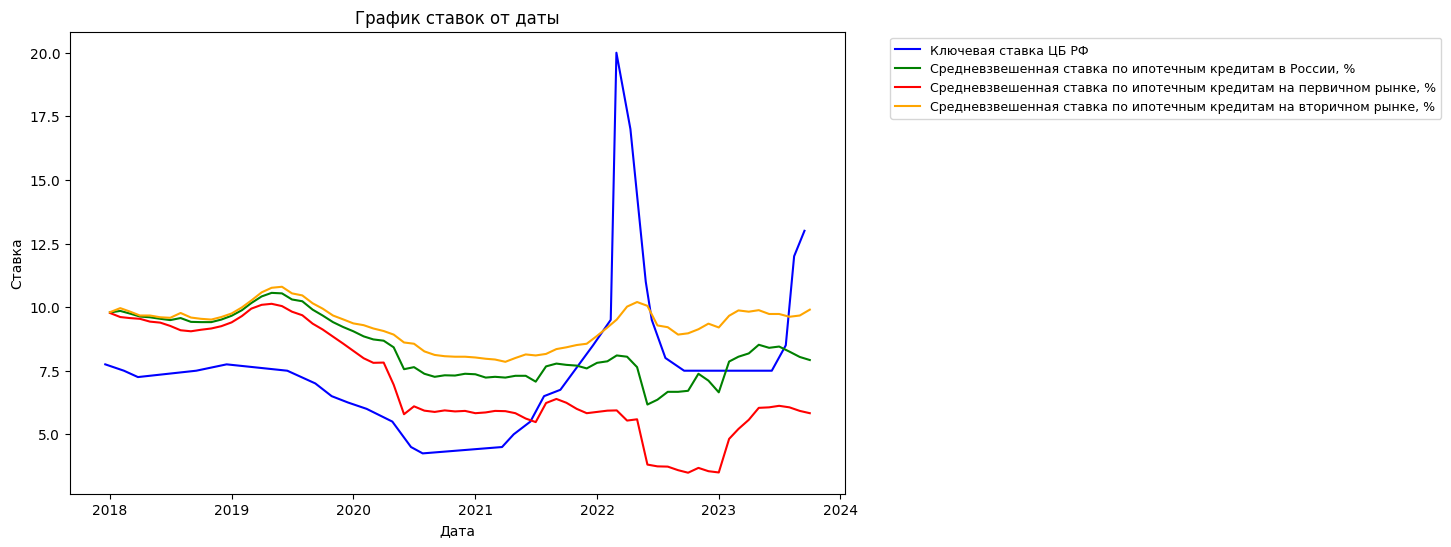

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(key_rate['date'], key_rate['key_rate'],  linestyle='-', color='b', markersize=6, label='Ключевая ставка ЦБ РФ')
plt.plot(mortgage_rate['Дата'], mortgage_rate['Средневзвешенная ставка по ипотечным кредитам в России, %'],  linestyle='-', color='g', markersize=6, label='Средневзвешенная ставка по ипотечным кредитам в России, %')
plt.plot(mortgage_rate['Дата'], mortgage_rate['Средневзвешенная ставка по ипотечным кредитам на первичном рынке, %'],  linestyle='-', color='r', markersize=6, label='Средневзвешенная ставка по ипотечным кредитам на первичном рынке, %')
plt.plot(mortgage_rate['Дата'], mortgage_rate['Средневзвешенная ставка по ипотечным кредитам на вторичном рынке, %'],  linestyle='-', color='orange', markersize=6, label='Средневзвешенная ставка по ипотечным кредитам на вторичном рынке, %')

plt.xlabel('Дата')
plt.ylabel('Ставка')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)
plt.title('График ставок от даты')

In [5]:

full_df = pd.merge(key_rate, mortgage_rate[['Дата', 'Средневзвешенная ставка по ипотечным кредитам в России, %']], left_on='date', right_on='Дата', how='outer')
full_df['Date'] = full_df['date'].combine_first(full_df['Дата'])
full_df = (full_df
           .drop(['date', 'Дата'], axis=1)
           [['Date', 'key_rate', 'Средневзвешенная ставка по ипотечным кредитам в России, %']]
           .sort_values('Date')
           .reset_index(drop=True)
           .rename(columns={'Средневзвешенная ставка по ипотечным кредитам в России, %': 'mortgage_rate'})
           )


In [6]:
full_df[['key_rate', 'mortgage_rate']] = full_df[['key_rate', 'mortgage_rate']].ffill()
full_df = full_df.drop(0)

In [7]:

def plot_with_slider(start_date, end_date):
    start_date = pd.to_datetime(start_date, format='mm.dd.yyyy')
    end_date =pd.to_datetime(end_date, format='mm.dd.yyyy')
    temp_df = full_df[(full_df['Date'] >= start_date) & (full_df['Date'] <= end_date)].sort_values(by='Date').reset_index(drop=True)

    correlation = temp_df['key_rate'].corr(temp_df['mortgage_rate'])
    print(f'Корреляция между ключевой ставкой и ставкой по ипотеке:\n{correlation}')
    
    # Шаг 1: Визуализация данных
    plt.figure(figsize=(10, 6))

    # График для ключевой ставки ЦБ
    plt.plot(temp_df['Date'], temp_df['key_rate'], linestyle='-', color='b', label='Ключевая ставка ЦБ')

    # График для среднемесячной ставки по ипотеке
    plt.plot(temp_df['Date'], temp_df['mortgage_rate'], linestyle='-', color='r', label='Ставка по ипотеке')

    plt.xlabel('Дата')
    plt.ylabel('Ставка')
    plt.title('Зависимость между ключевой ставкой ЦБ и ставкой по ипотеке')
    plt.legend()
    plt.grid(True)

    # Отображение графика
    plt.show()

start_date = full_df['Date'].min()
end_date = full_df['Date'].max()

# Создаем виджеты для слайдера
start_date_widget = widgets.DatePicker(value=start_date, description=' ')
end_date_widget = widgets.DatePicker(value=end_date, description=' ')

# Интерактивная функция с слайдером
interact(plot_with_slider, start_date=start_date_widget, end_date=end_date_widget)


interactive(children=(DatePicker(value=Timestamp('2018-01-01 00:00:00'), description=' ', step=1), DatePicker(…

<function __main__.plot_with_slider(start_date, end_date)>

In [8]:
full_df.to_csv('all_rates.csv', index=False)